In [72]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [74]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [75]:
tf.keras.backend.clear_session()

In [76]:
subject = 'Pará - Consumo de Cimento (t)'
start_index = 0
split_index = 191 #Referente aos 230 anos de input 
window_size = 36
train_split = split_index + 1 - 30

In [77]:
data = pd.read_csv('2003_mo_model_input_PA.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pará - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pará - Produção de Cimento (t),Pará - value,Pará - IDH,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,8.348543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.618560,0.312867,0.669564,7.776091e+07,4.250430e+06,9.220374,6.851269e+07,84.701
1,2003-2,0.690297,-5318.079644,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,8.342554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.658098,0.312657,0.669764,7.787181e+07,4.255476e+06,9.225493,6.856365e+07,80.221
2,2003-3,0.669681,-5436.417870,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,8.336566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.906876,0.311736,0.669963,7.798271e+07,4.260521e+06,9.230612,6.861461e+07,76.122
3,2003-4,0.660494,-5707.015274,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,8.330578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.864305,0.310493,0.670163,7.809361e+07,4.265566e+06,9.235731,6.866557e+07,76.544
4,2003-5,0.648337,-5599.317941,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,8.324589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.179753,0.309128,0.670362,7.820451e+07,4.270611e+06,9.240851,6.871652e+07,83.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.965936,1008.801092,1303.665980,27.327702,23.614315,81.521690,1.072963,75.899018,0.710173,NaN,NaN,NaN,NaN,NaN,156.442
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.815698,1008.460979,1272.729672,27.293641,23.675994,81.930176,1.042227,75.416567,0.708384,NaN,NaN,NaN,NaN,NaN,145.777
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.722644,1008.241464,1251.459460,27.268138,23.713867,82.214857,1.013091,75.559167,0.706038,NaN,NaN,NaN,NaN,NaN,139.233
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.722035,1008.156435,1227.862175,27.179370,23.747005,82.781857,0.965619,75.696005,0.702147,NaN,NaN,NaN,NaN,NaN,142.025


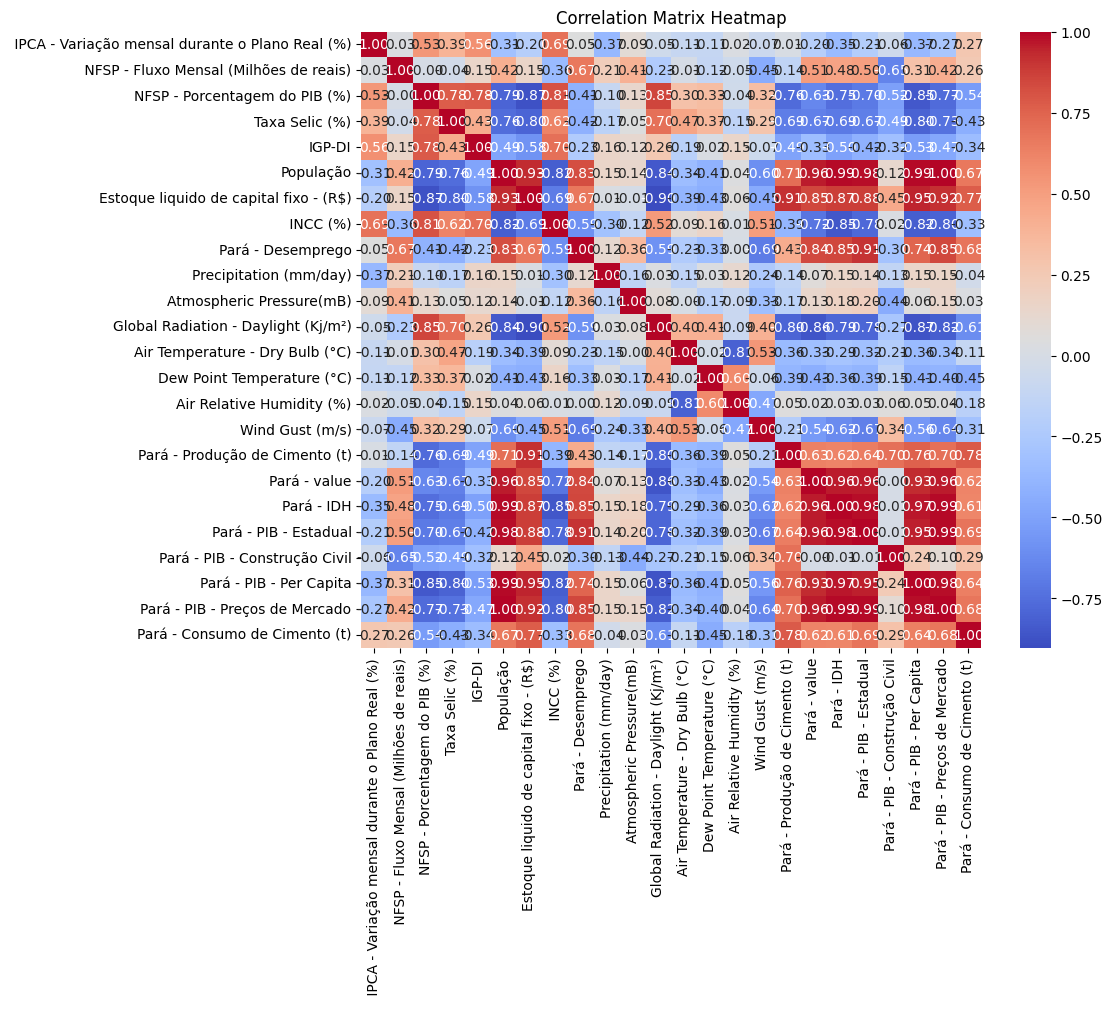

In [78]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [79]:
data =data.drop(['Precipitation (mm/day)',
                 'Atmospheric Pressure(mB)',
                 'Air Temperature - Dry Bulb (°C)',
                 'Air Relative Humidity (%)', 
                 'Wind Gust (m/s)'], axis=1)
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pará - Desemprego,Global Radiation - Daylight (Kj/m²),Dew Point Temperature (°C),Pará - Produção de Cimento (t),Pará - value,Pará - IDH,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado,Pará - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,8.348543,NaN,NaN,49.618560,0.312867,0.669564,7.776091e+07,4.250430e+06,9.220374,6.851269e+07,84.701
1,2003-2,0.690297,-5318.079644,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,8.342554,NaN,NaN,49.658098,0.312657,0.669764,7.787181e+07,4.255476e+06,9.225493,6.856365e+07,80.221
2,2003-3,0.669681,-5436.417870,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,8.336566,NaN,NaN,49.906876,0.311736,0.669963,7.798271e+07,4.260521e+06,9.230612,6.861461e+07,76.122
3,2003-4,0.660494,-5707.015274,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,8.330578,NaN,NaN,49.864305,0.310493,0.670163,7.809361e+07,4.265566e+06,9.235731,6.866557e+07,76.544
4,2003-5,0.648337,-5599.317941,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,8.324589,NaN,NaN,50.179753,0.309128,0.670362,7.820451e+07,4.270611e+06,9.240851,6.871652e+07,83.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303.665980,23.614315,75.899018,0.710173,NaN,NaN,NaN,NaN,NaN,156.442
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1272.729672,23.675994,75.416567,0.708384,NaN,NaN,NaN,NaN,NaN,145.777
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251.459460,23.713867,75.559167,0.706038,NaN,NaN,NaN,NaN,NaN,139.233
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1227.862175,23.747005,75.696005,0.702147,NaN,NaN,NaN,NaN,NaN,142.025


In [80]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data = input_data.fillna(0.0)
input_data

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pará - Desemprego,Global Radiation - Daylight (Kj/m²),Dew Point Temperature (°C),Pará - Produção de Cimento (t),Pará - value,Pará - IDH,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado
0,2.723741,0.364808,4.398348,2.132459,3.890153,-2.042341,-2.389042,3.122582,-0.743008,0.000000,0.000000,-1.860097,-1.001954,-1.906833,-1.652592,-1.810463,-2.287151,-1.950096
1,2.350880,0.368956,4.222509,1.592202,3.551840,-2.014760,-2.352139,2.970356,-0.748918,0.000000,0.000000,-1.858558,-1.004769,-1.880912,-1.635387,-1.758101,-2.245800,-1.920309
2,2.123016,0.331110,4.026019,2.999926,3.391423,-1.987179,-2.315236,2.869895,-0.754829,0.000000,0.000000,-1.848873,-1.017098,-1.854991,-1.618182,-1.705740,-2.204450,-1.890522
3,2.021477,0.244570,3.811492,1.273293,3.135979,-1.959598,-2.278333,2.773628,-0.760740,0.000000,0.000000,-1.850531,-1.033739,-1.829071,-1.600977,-1.653378,-2.163099,-1.860734
4,1.887113,0.279013,3.567576,2.045407,2.955412,-1.932017,-2.241431,2.977624,-0.766650,0.000000,0.000000,-1.838250,-1.052007,-1.803150,-1.583772,-1.601017,-2.121748,-1.830947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-2.010387,2.953658,-0.572934,-1.311366,0.589021,1.365911,0.389193,-1.749976,1.076246,-0.624345,-1.013595,-0.644020,1.421704,1.389768,1.316401,-0.980846,1.292832,1.315283
188,-1.870713,3.351323,-0.588777,-1.417143,1.043728,1.376610,0.370392,-1.593005,1.073514,-0.633143,-0.767267,-0.676398,1.447588,1.378488,1.314484,-0.973932,1.302757,1.318820
189,-1.806230,3.404908,-0.612606,-1.597784,1.387010,1.387308,0.351592,-1.351489,1.070782,-0.646286,-0.449652,-0.703221,1.485640,1.367208,1.312566,-0.967018,1.312682,1.322356
190,-1.727496,3.671303,-0.640956,-1.400787,1.815728,1.398006,0.332791,-1.198492,1.068050,-0.667233,0.005375,-0.725198,1.528780,1.355927,1.310648,-0.960105,1.322607,1.325893


In [81]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-12)
target_data

0      110.204
1       76.354
2       77.171
3       80.720
4       82.088
        ...   
235        NaN
236        NaN
237        NaN
238        NaN
239        NaN
Name: Pará - Consumo de Cimento (t), Length: 240, dtype: float64

In [98]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pará - Desemprego,Global Radiation - Daylight (Kj/m²),Dew Point Temperature (°C),Pará - Produção de Cimento (t),Pará - value,Pará - IDH,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado
0,2.723741,0.364808,4.398348,2.132459,3.890153,-2.042341,-2.389042,3.122582,-0.743008,0.000000,0.000000,-1.860097,-1.001954,-1.906833,-1.652592,-1.810463,-2.287151,-1.950096
1,2.350880,0.368956,4.222509,1.592202,3.551840,-2.014760,-2.352139,2.970356,-0.748918,0.000000,0.000000,-1.858558,-1.004769,-1.880912,-1.635387,-1.758101,-2.245800,-1.920309
2,2.123016,0.331110,4.026019,2.999926,3.391423,-1.987179,-2.315236,2.869895,-0.754829,0.000000,0.000000,-1.848873,-1.017098,-1.854991,-1.618182,-1.705740,-2.204450,-1.890522
3,2.021477,0.244570,3.811492,1.273293,3.135979,-1.959598,-2.278333,2.773628,-0.760740,0.000000,0.000000,-1.850531,-1.033739,-1.829071,-1.600977,-1.653378,-2.163099,-1.860734
4,1.887113,0.279013,3.567576,2.045407,2.955412,-1.932017,-2.241431,2.977624,-0.766650,0.000000,0.000000,-1.838250,-1.052007,-1.803150,-1.583772,-1.601017,-2.121748,-1.830947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.214006,1.216560,-0.607704,0.043807,-1.233012,1.031384,0.819304,-0.883659,1.444243,-0.647671,1.488425,0.582557,1.197817,1.368533,1.186547,-1.094003,0.861099,1.054711
158,-0.434717,1.155373,-0.620523,0.210856,-1.299304,1.042716,0.808136,-0.950771,1.421118,-0.646200,1.448750,0.538378,1.208551,1.376125,1.197116,-1.099823,0.885880,1.071769
159,-0.524091,1.056140,-0.631530,0.107070,-1.248662,1.054049,0.796969,-1.028465,1.397993,-0.637767,1.027045,0.482165,1.218732,1.383716,1.207686,-1.105643,0.910662,1.088827
160,-0.614500,1.147619,-0.640320,0.392942,-1.068274,1.065381,0.785801,-1.103668,1.374869,-0.628627,0.413319,0.427013,1.224310,1.391308,1.218256,-1.111463,0.935444,1.105885


In [99]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      110.204
1       76.354
2       77.171
3       80.720
4       82.088
        ...   
157    116.872
158    131.959
159    116.171
160    132.242
161    135.615
Name: Pará - Consumo de Cimento (t), Length: 162, dtype: float64

In [100]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [105]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(126, 36, 18)

In [106]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pará - Desemprego,Global Radiation - Daylight (Kj/m²),Dew Point Temperature (°C),Pará - Produção de Cimento (t),Pará - value,Pará - IDH,Pará - PIB - Estadual,Pará - PIB - Construção Civil,Pará - PIB - Per Capita,Pará - PIB - Preços de Mercado
126,0.888984,-0.230612,-0.460555,-1.048761,-0.368821,0.651397,0.944085,0.045243,0.937142,-0.600256,-0.709820,1.114270,0.390386,0.491346,0.718639,0.747580,0.575976,0.685697
127,0.954254,-0.156322,-0.440372,-0.649312,-0.328087,0.664707,0.947319,0.061828,0.968970,-0.594195,-0.776470,1.082022,0.414807,0.506090,0.735578,0.698813,0.571078,0.692184
128,1.045217,-0.120008,-0.419247,-0.535369,-0.176031,0.678017,0.950553,0.046225,1.000798,-0.592734,-0.936687,1.052039,0.439827,0.520835,0.752516,0.650046,0.566181,0.698671
129,1.176395,-0.143194,-0.397019,-1.288807,-0.113037,0.691327,0.953786,0.032522,1.032625,-0.596437,-1.007107,1.020267,0.471477,0.535579,0.769455,0.601279,0.561283,0.705157
130,1.303259,-0.028712,-0.376532,-1.507550,-0.022703,0.704637,0.957020,0.042757,1.064453,-0.608704,-0.796684,0.982058,0.505972,0.550323,0.786394,0.552512,0.556385,0.711644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-2.010387,2.953658,-0.572934,-1.311366,0.589021,1.365911,0.389193,-1.749976,1.076246,-0.624345,-1.013595,-0.644020,1.421704,1.389768,1.316401,-0.980846,1.292832,1.315283
188,-1.870713,3.351323,-0.588777,-1.417143,1.043728,1.376610,0.370392,-1.593005,1.073514,-0.633143,-0.767267,-0.676398,1.447588,1.378488,1.314484,-0.973932,1.302757,1.318820
189,-1.806230,3.404908,-0.612606,-1.597784,1.387010,1.387308,0.351592,-1.351489,1.070782,-0.646286,-0.449652,-0.703221,1.485640,1.367208,1.312566,-0.967018,1.312682,1.322356
190,-1.727496,3.671303,-0.640956,-1.400787,1.815728,1.398006,0.332791,-1.198492,1.068050,-0.667233,0.005375,-0.725198,1.528780,1.355927,1.310648,-0.960105,1.322607,1.325893


In [107]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(30, 36, 18)

In [108]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [109]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    train, train_val = validation_splitter(train_input, 6)
    target,target_val = validation_splitter(train_target, 6)
#     display(train.shape)
#     display(train_val.shape)
#     display(target.shape)
#     display(target_val.shape)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                             return_sequences=True, 
                             input_shape=(reshaped_train.shape[1],
                                          reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(180,activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
#                         validation_data=(train_val,
#                                          target_val),
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [110]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(1)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [91]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1293460209]


Step: 0 ___________________________________________
val_loss: 323.2526550292969
winner_seed: 1293460209


final_seed: 1293460209


In [92]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 3s 154ms/step - loss: 25462.0391 - val_loss: 21751.1250
Epoch 2/10000
4/4 [==============================] - 0s 17ms/step - loss: 25048.8809 - val_loss: 21675.5820
Epoch 3/10000
4/4 [==============================] - 0s 17ms/step - loss: 24555.6719 - val_loss: 20993.5234
Epoch 4/10000
4/4 [==============================] - 0s 17ms/step - loss: 24148.1191 - val_loss: 20346.6953
Epoch 5/10000
4/4 [==============================] - 0s 16ms/step - loss: 23850.2559 - val_loss: 20035.0898
Epoch 6/10000
4/4 [==============================] - 0s 18ms/step - loss: 23634.1953 - val_loss: 19869.8770
Epoch 7/10000
4/4 [==============================] - 0s 17ms/step - loss: 23486.2148 - val_loss: 19761.5879
Epoch 8/10000
4/4 [==============================] - 0s 16ms/step - loss: 23377.6641 - val_loss: 19680.3125
Epoch 9/10000
4/4 [==============================] - 0s 15ms/step - loss: 23293.7871 - val_loss: 19613.6953
Epoch 10/10000
4/4 [=======

4/4 [==============================] - 0s 15ms/step - loss: 20455.9355 - val_loss: 16920.3066
Epoch 77/10000
4/4 [==============================] - 0s 15ms/step - loss: 20418.9766 - val_loss: 16885.6055
Epoch 78/10000
4/4 [==============================] - 0s 20ms/step - loss: 20382.6992 - val_loss: 16850.9609
Epoch 79/10000
4/4 [==============================] - 0s 16ms/step - loss: 20345.6367 - val_loss: 16816.6875
Epoch 80/10000
4/4 [==============================] - 0s 17ms/step - loss: 20309.5547 - val_loss: 16782.1035
Epoch 81/10000
4/4 [==============================] - 0s 15ms/step - loss: 20272.8359 - val_loss: 16747.7129
Epoch 82/10000
4/4 [==============================] - 0s 21ms/step - loss: 20236.3613 - val_loss: 16713.1797
Epoch 83/10000
4/4 [==============================] - 0s 15ms/step - loss: 20199.7559 - val_loss: 16678.9648
Epoch 84/10000
4/4 [==============================] - 0s 17ms/step - loss: 20163.7812 - val_loss: 16644.6582
Epoch 85/10000
4/4 [==============

Epoch 151/10000
4/4 [==============================] - 0s 21ms/step - loss: 17873.8633 - val_loss: 14514.7773
Epoch 152/10000
4/4 [==============================] - 0s 18ms/step - loss: 17841.1426 - val_loss: 14484.7197
Epoch 153/10000
4/4 [==============================] - 0s 16ms/step - loss: 17808.4980 - val_loss: 14454.8457
Epoch 154/10000
4/4 [==============================] - 0s 16ms/step - loss: 17776.5195 - val_loss: 14424.9580
Epoch 155/10000
4/4 [==============================] - 0s 17ms/step - loss: 17744.6055 - val_loss: 14395.1182
Epoch 156/10000
4/4 [==============================] - 0s 19ms/step - loss: 17711.9102 - val_loss: 14365.5420
Epoch 157/10000
4/4 [==============================] - 0s 17ms/step - loss: 17679.6504 - val_loss: 14335.8691
Epoch 158/10000
4/4 [==============================] - 0s 17ms/step - loss: 17647.9219 - val_loss: 14306.0723
Epoch 159/10000
4/4 [==============================] - 0s 18ms/step - loss: 17615.7266 - val_loss: 14276.4395
Epoch 160/

4/4 [==============================] - 0s 18ms/step - loss: 15605.4980 - val_loss: 12424.5049
Epoch 226/10000
4/4 [==============================] - 0s 17ms/step - loss: 15576.4668 - val_loss: 12397.9844
Epoch 227/10000
4/4 [==============================] - 0s 16ms/step - loss: 15547.3594 - val_loss: 12371.4824
Epoch 228/10000
4/4 [==============================] - 0s 17ms/step - loss: 15518.5508 - val_loss: 12345.0449
Epoch 229/10000
4/4 [==============================] - 0s 16ms/step - loss: 15489.8799 - val_loss: 12318.5068
Epoch 230/10000
4/4 [==============================] - 0s 16ms/step - loss: 15461.4473 - val_loss: 12291.9443
Epoch 231/10000
4/4 [==============================] - 0s 13ms/step - loss: 15432.3408 - val_loss: 12265.8018
Epoch 232/10000
4/4 [==============================] - 0s 18ms/step - loss: 15403.6680 - val_loss: 12239.7188
Epoch 233/10000
4/4 [==============================] - 0s 17ms/step - loss: 15375.1914 - val_loss: 12213.5322
Epoch 234/10000
4/4 [=====

4/4 [==============================] - 0s 16ms/step - loss: 13575.4092 - val_loss: 10566.2852
Epoch 300/10000
4/4 [==============================] - 0s 15ms/step - loss: 13549.3145 - val_loss: 10542.4844
Epoch 301/10000
4/4 [==============================] - 0s 18ms/step - loss: 13522.9189 - val_loss: 10518.9844
Epoch 302/10000
4/4 [==============================] - 0s 18ms/step - loss: 13497.5381 - val_loss: 10495.2305
Epoch 303/10000
4/4 [==============================] - 0s 15ms/step - loss: 13471.5000 - val_loss: 10471.5635
Epoch 304/10000
4/4 [==============================] - 0s 17ms/step - loss: 13445.6328 - val_loss: 10448.0137
Epoch 305/10000
4/4 [==============================] - 0s 18ms/step - loss: 13419.4932 - val_loss: 10424.5566
Epoch 306/10000
4/4 [==============================] - 0s 17ms/step - loss: 13394.1699 - val_loss: 10401.1230
Epoch 307/10000
4/4 [==============================] - 0s 17ms/step - loss: 13368.7217 - val_loss: 10377.8945
Epoch 308/10000
4/4 [=====

4/4 [==============================] - 0s 17ms/step - loss: 11737.5234 - val_loss: 8894.2852
Epoch 375/10000
4/4 [==============================] - 0s 19ms/step - loss: 11714.1240 - val_loss: 8873.2676
Epoch 376/10000
4/4 [==============================] - 0s 20ms/step - loss: 11691.1553 - val_loss: 8852.1943
Epoch 377/10000
4/4 [==============================] - 0s 17ms/step - loss: 11667.4648 - val_loss: 8831.4824
Epoch 378/10000
4/4 [==============================] - 0s 21ms/step - loss: 11644.9473 - val_loss: 8810.5020
Epoch 379/10000
4/4 [==============================] - 0s 17ms/step - loss: 11621.4609 - val_loss: 8789.6523
Epoch 380/10000
4/4 [==============================] - 0s 18ms/step - loss: 11598.6338 - val_loss: 8768.7021
Epoch 381/10000
4/4 [==============================] - 0s 21ms/step - loss: 11576.0068 - val_loss: 8747.8467
Epoch 382/10000
4/4 [==============================] - 0s 16ms/step - loss: 11552.9492 - val_loss: 8727.1348
Epoch 383/10000
4/4 [==============

4/4 [==============================] - 0s 19ms/step - loss: 10100.9805 - val_loss: 7416.6821
Epoch 450/10000
4/4 [==============================] - 0s 17ms/step - loss: 10080.4453 - val_loss: 7398.0391
Epoch 451/10000
4/4 [==============================] - 0s 19ms/step - loss: 10060.0693 - val_loss: 7379.5225
Epoch 452/10000
4/4 [==============================] - 0s 18ms/step - loss: 10039.2100 - val_loss: 7361.1050
Epoch 453/10000
4/4 [==============================] - 0s 20ms/step - loss: 10018.9189 - val_loss: 7342.5947
Epoch 454/10000
4/4 [==============================] - 0s 18ms/step - loss: 9998.6836 - val_loss: 7324.0713
Epoch 455/10000
4/4 [==============================] - 0s 17ms/step - loss: 9978.2090 - val_loss: 7305.7598
Epoch 456/10000
4/4 [==============================] - 0s 21ms/step - loss: 9957.9824 - val_loss: 7287.3833
Epoch 457/10000
4/4 [==============================] - 0s 15ms/step - loss: 9937.1562 - val_loss: 7269.0366
Epoch 458/10000
4/4 [==================

Epoch 525/10000
4/4 [==============================] - 0s 18ms/step - loss: 8628.4727 - val_loss: 6095.4062
Epoch 526/10000
4/4 [==============================] - 0s 20ms/step - loss: 8611.0078 - val_loss: 6078.9380
Epoch 527/10000
4/4 [==============================] - 0s 17ms/step - loss: 8592.4990 - val_loss: 6062.7778
Epoch 528/10000
4/4 [==============================] - 0s 17ms/step - loss: 8574.5723 - val_loss: 6046.5435
Epoch 529/10000
4/4 [==============================] - 0s 19ms/step - loss: 8556.6494 - val_loss: 6030.4131
Epoch 530/10000
4/4 [==============================] - 0s 17ms/step - loss: 8538.3193 - val_loss: 6014.4229
Epoch 531/10000
4/4 [==============================] - 0s 16ms/step - loss: 8520.6240 - val_loss: 5998.3984
Epoch 532/10000
4/4 [==============================] - 0s 19ms/step - loss: 8502.7568 - val_loss: 5982.2998
Epoch 533/10000
4/4 [==============================] - 0s 15ms/step - loss: 8484.7158 - val_loss: 5966.1997
Epoch 534/10000
4/4 [=======

Epoch 601/10000
4/4 [==============================] - 0s 15ms/step - loss: 7334.2256 - val_loss: 4943.8853
Epoch 602/10000
4/4 [==============================] - 0s 13ms/step - loss: 7317.9180 - val_loss: 4929.9204
Epoch 603/10000
4/4 [==============================] - 0s 13ms/step - loss: 7302.3032 - val_loss: 4915.8066
Epoch 604/10000
4/4 [==============================] - 0s 18ms/step - loss: 7286.5752 - val_loss: 4901.6685
Epoch 605/10000
4/4 [==============================] - 0s 13ms/step - loss: 7270.6997 - val_loss: 4887.7109
Epoch 606/10000
4/4 [==============================] - 0s 13ms/step - loss: 7255.0405 - val_loss: 4873.7271
Epoch 607/10000
4/4 [==============================] - 0s 15ms/step - loss: 7238.9458 - val_loss: 4859.7891
Epoch 608/10000
4/4 [==============================] - 0s 14ms/step - loss: 7223.5615 - val_loss: 4845.8545
Epoch 609/10000
4/4 [==============================] - 0s 16ms/step - loss: 7207.2432 - val_loss: 4832.1001
Epoch 610/10000
4/4 [=======

Epoch 677/10000
4/4 [==============================] - 0s 20ms/step - loss: 6206.1191 - val_loss: 3957.2263
Epoch 678/10000
4/4 [==============================] - 0s 17ms/step - loss: 6192.5874 - val_loss: 3945.1055
Epoch 679/10000
4/4 [==============================] - 0s 16ms/step - loss: 6178.7065 - val_loss: 3933.0276
Epoch 680/10000
4/4 [==============================] - 0s 20ms/step - loss: 6164.4570 - val_loss: 3921.1558
Epoch 681/10000
4/4 [==============================] - 0s 17ms/step - loss: 6151.5420 - val_loss: 3909.0259
Epoch 682/10000
4/4 [==============================] - 0s 16ms/step - loss: 6137.2573 - val_loss: 3897.0608
Epoch 683/10000
4/4 [==============================] - 0s 19ms/step - loss: 6123.4434 - val_loss: 3885.1589
Epoch 684/10000
4/4 [==============================] - 0s 17ms/step - loss: 6109.6128 - val_loss: 3873.3303
Epoch 685/10000
4/4 [==============================] - 0s 15ms/step - loss: 6096.1665 - val_loss: 3861.4534
Epoch 686/10000
4/4 [=======

Epoch 753/10000
4/4 [==============================] - 0s 17ms/step - loss: 5230.1846 - val_loss: 3119.5342
Epoch 754/10000
4/4 [==============================] - 0s 18ms/step - loss: 5218.5840 - val_loss: 3109.3623
Epoch 755/10000
4/4 [==============================] - 0s 20ms/step - loss: 5206.3213 - val_loss: 3099.3193
Epoch 756/10000
4/4 [==============================] - 0s 18ms/step - loss: 5194.5781 - val_loss: 3089.2393
Epoch 757/10000
4/4 [==============================] - 0s 18ms/step - loss: 5182.7622 - val_loss: 3079.1318
Epoch 758/10000
4/4 [==============================] - 0s 20ms/step - loss: 5170.8506 - val_loss: 3069.0708
Epoch 759/10000
4/4 [==============================] - 0s 18ms/step - loss: 5159.2871 - val_loss: 3059.0095
Epoch 760/10000
4/4 [==============================] - 0s 17ms/step - loss: 5147.2124 - val_loss: 3049.1123
Epoch 761/10000
4/4 [==============================] - 0s 20ms/step - loss: 5135.6851 - val_loss: 3039.1155
Epoch 762/10000
4/4 [=======

Epoch 829/10000
4/4 [==============================] - 0s 17ms/step - loss: 4391.4351 - val_loss: 2415.7456
Epoch 830/10000
4/4 [==============================] - 0s 17ms/step - loss: 4381.0776 - val_loss: 2407.3398
Epoch 831/10000
4/4 [==============================] - 0s 18ms/step - loss: 4371.0425 - val_loss: 2398.9221
Epoch 832/10000
4/4 [==============================] - 0s 20ms/step - loss: 4360.7544 - val_loss: 2390.6406
Epoch 833/10000
4/4 [==============================] - 0s 17ms/step - loss: 4350.8501 - val_loss: 2382.3867
Epoch 834/10000
4/4 [==============================] - 0s 21ms/step - loss: 4340.6875 - val_loss: 2374.2051
Epoch 835/10000
4/4 [==============================] - 0s 18ms/step - loss: 4330.8384 - val_loss: 2365.9226
Epoch 836/10000
4/4 [==============================] - 0s 16ms/step - loss: 4321.0630 - val_loss: 2357.6187
Epoch 837/10000
4/4 [==============================] - 0s 20ms/step - loss: 4310.7954 - val_loss: 2349.4548
Epoch 838/10000
4/4 [=======

Epoch 905/10000
4/4 [==============================] - 0s 18ms/step - loss: 3685.3838 - val_loss: 1839.8737
Epoch 906/10000
4/4 [==============================] - 0s 20ms/step - loss: 3676.7808 - val_loss: 1833.1549
Epoch 907/10000
4/4 [==============================] - 0s 17ms/step - loss: 3668.4170 - val_loss: 1826.3273
Epoch 908/10000
4/4 [==============================] - 0s 18ms/step - loss: 3660.0061 - val_loss: 1819.5240
Epoch 909/10000
4/4 [==============================] - 0s 22ms/step - loss: 3651.5808 - val_loss: 1812.7363
Epoch 910/10000
4/4 [==============================] - 0s 17ms/step - loss: 3643.2441 - val_loss: 1806.0364
Epoch 911/10000
4/4 [==============================] - 0s 21ms/step - loss: 3634.6426 - val_loss: 1799.3937
Epoch 912/10000
4/4 [==============================] - 0s 15ms/step - loss: 3626.3784 - val_loss: 1792.7325
Epoch 913/10000
4/4 [==============================] - 0s 19ms/step - loss: 3618.2649 - val_loss: 1786.0802
Epoch 914/10000
4/4 [=======

Epoch 981/10000
4/4 [==============================] - 0s 19ms/step - loss: 3097.5027 - val_loss: 1376.5923
Epoch 982/10000
4/4 [==============================] - 0s 19ms/step - loss: 3090.4214 - val_loss: 1371.1738
Epoch 983/10000
4/4 [==============================] - 0s 20ms/step - loss: 3083.4480 - val_loss: 1365.7814
Epoch 984/10000
4/4 [==============================] - 0s 18ms/step - loss: 3076.5229 - val_loss: 1360.3601
Epoch 985/10000
4/4 [==============================] - 0s 19ms/step - loss: 3069.9475 - val_loss: 1354.8923
Epoch 986/10000
4/4 [==============================] - 0s 18ms/step - loss: 3062.5562 - val_loss: 1349.6448
Epoch 987/10000
4/4 [==============================] - 0s 17ms/step - loss: 3055.7712 - val_loss: 1344.3845
Epoch 988/10000
4/4 [==============================] - 0s 18ms/step - loss: 3048.8171 - val_loss: 1339.1671
Epoch 989/10000
4/4 [==============================] - 0s 20ms/step - loss: 3042.3237 - val_loss: 1333.9006
Epoch 990/10000
4/4 [=======

4/4 [==============================] - 0s 17ms/step - loss: 2626.3518 - val_loss: 1021.4501
Epoch 1057/10000
4/4 [==============================] - 0s 16ms/step - loss: 2620.7075 - val_loss: 1017.4200
Epoch 1058/10000
4/4 [==============================] - 0s 18ms/step - loss: 2615.2715 - val_loss: 1013.3354
Epoch 1059/10000
4/4 [==============================] - 0s 20ms/step - loss: 2609.7422 - val_loss: 1009.2373
Epoch 1060/10000
4/4 [==============================] - 0s 18ms/step - loss: 2604.1543 - val_loss: 1005.1562
Epoch 1061/10000
4/4 [==============================] - 0s 17ms/step - loss: 2598.6377 - val_loss: 1001.0453
Epoch 1062/10000
4/4 [==============================] - 0s 19ms/step - loss: 2592.8408 - val_loss: 997.0030
Epoch 1063/10000
4/4 [==============================] - 0s 17ms/step - loss: 2587.4421 - val_loss: 992.8847
Epoch 1064/10000
4/4 [==============================] - 0s 17ms/step - loss: 2582.0027 - val_loss: 988.8126
Epoch 1065/10000
4/4 [=================

Epoch 1132/10000
4/4 [==============================] - 0s 18ms/step - loss: 2245.0518 - val_loss: 750.6125
Epoch 1133/10000
4/4 [==============================] - 0s 17ms/step - loss: 2240.6924 - val_loss: 747.5509
Epoch 1134/10000
4/4 [==============================] - 0s 18ms/step - loss: 2236.0464 - val_loss: 744.5923
Epoch 1135/10000
4/4 [==============================] - 0s 18ms/step - loss: 2231.6973 - val_loss: 741.6328
Epoch 1136/10000
4/4 [==============================] - 0s 17ms/step - loss: 2227.5105 - val_loss: 738.6280
Epoch 1137/10000
4/4 [==============================] - 0s 18ms/step - loss: 2223.0132 - val_loss: 735.6864
Epoch 1138/10000
4/4 [==============================] - 0s 19ms/step - loss: 2218.6438 - val_loss: 732.7387
Epoch 1139/10000
4/4 [==============================] - 0s 17ms/step - loss: 2214.2153 - val_loss: 729.8574
Epoch 1140/10000
4/4 [==============================] - 0s 21ms/step - loss: 2210.1606 - val_loss: 726.9300
Epoch 1141/10000
4/4 [======

Epoch 1208/10000
4/4 [==============================] - 0s 14ms/step - loss: 1951.8519 - val_loss: 559.4712
Epoch 1209/10000
4/4 [==============================] - 0s 16ms/step - loss: 1948.3134 - val_loss: 557.4461
Epoch 1210/10000
4/4 [==============================] - 0s 17ms/step - loss: 1945.1487 - val_loss: 555.3752
Epoch 1211/10000
4/4 [==============================] - 0s 15ms/step - loss: 1941.9119 - val_loss: 553.2997
Epoch 1212/10000
4/4 [==============================] - 0s 14ms/step - loss: 1938.3833 - val_loss: 551.3104
Epoch 1213/10000
4/4 [==============================] - 0s 14ms/step - loss: 1935.3507 - val_loss: 549.2861
Epoch 1214/10000
4/4 [==============================] - 0s 15ms/step - loss: 1932.0229 - val_loss: 547.2960
Epoch 1215/10000
4/4 [==============================] - 0s 19ms/step - loss: 1928.5530 - val_loss: 545.3492
Epoch 1216/10000
4/4 [==============================] - 0s 16ms/step - loss: 1925.4275 - val_loss: 543.3194
Epoch 1217/10000
4/4 [======

Epoch 1284/10000
4/4 [==============================] - 0s 17ms/step - loss: 1732.1681 - val_loss: 433.4876
Epoch 1285/10000
4/4 [==============================] - 0s 22ms/step - loss: 1729.7444 - val_loss: 432.2616
Epoch 1286/10000
4/4 [==============================] - 0s 17ms/step - loss: 1727.3949 - val_loss: 431.0425
Epoch 1287/10000
4/4 [==============================] - 0s 17ms/step - loss: 1725.0413 - val_loss: 429.8349
Epoch 1288/10000
4/4 [==============================] - 0s 17ms/step - loss: 1722.9602 - val_loss: 428.6017
Epoch 1289/10000
4/4 [==============================] - 0s 22ms/step - loss: 1720.4330 - val_loss: 427.4247
Epoch 1290/10000
4/4 [==============================] - 0s 16ms/step - loss: 1718.1785 - val_loss: 426.2458
Epoch 1291/10000
4/4 [==============================] - 0s 18ms/step - loss: 1715.8768 - val_loss: 425.0464
Epoch 1292/10000
4/4 [==============================] - 0s 21ms/step - loss: 1713.6102 - val_loss: 423.8333
Epoch 1293/10000
4/4 [======

Epoch 1360/10000
4/4 [==============================] - 0s 21ms/step - loss: 1576.1425 - val_loss: 360.9914
Epoch 1361/10000
4/4 [==============================] - 0s 17ms/step - loss: 1574.2382 - val_loss: 360.3475
Epoch 1362/10000
4/4 [==============================] - 0s 18ms/step - loss: 1572.6143 - val_loss: 359.6874
Epoch 1363/10000
4/4 [==============================] - 0s 20ms/step - loss: 1570.9001 - val_loss: 359.0425
Epoch 1364/10000
4/4 [==============================] - 0s 17ms/step - loss: 1569.2571 - val_loss: 358.3973
Epoch 1365/10000
4/4 [==============================] - 0s 17ms/step - loss: 1567.4670 - val_loss: 357.7625
Epoch 1366/10000
4/4 [==============================] - 0s 19ms/step - loss: 1565.9330 - val_loss: 357.1201
Epoch 1367/10000
4/4 [==============================] - 0s 19ms/step - loss: 1564.1335 - val_loss: 356.5144
Epoch 1368/10000
4/4 [==============================] - 0s 17ms/step - loss: 1562.7742 - val_loss: 355.8847
Epoch 1369/10000
4/4 [======

Epoch 1436/10000
4/4 [==============================] - 0s 19ms/step - loss: 1470.9718 - val_loss: 328.7841
Epoch 1437/10000
4/4 [==============================] - 0s 21ms/step - loss: 1469.7952 - val_loss: 328.5807
Epoch 1438/10000
4/4 [==============================] - 0s 18ms/step - loss: 1468.7686 - val_loss: 328.3758
Epoch 1439/10000
4/4 [==============================] - 0s 16ms/step - loss: 1467.7518 - val_loss: 328.1722
Epoch 1440/10000
4/4 [==============================] - 0s 19ms/step - loss: 1466.6406 - val_loss: 327.9778
Epoch 1441/10000
4/4 [==============================] - 0s 17ms/step - loss: 1465.5511 - val_loss: 327.7926
Epoch 1442/10000
4/4 [==============================] - 0s 18ms/step - loss: 1464.6074 - val_loss: 327.6051
Epoch 1443/10000
4/4 [==============================] - 0s 19ms/step - loss: 1463.6302 - val_loss: 327.4160
Epoch 1444/10000
4/4 [==============================] - 0s 17ms/step - loss: 1462.5829 - val_loss: 327.2379
Epoch 1445/10000
4/4 [======

Epoch 1512/10000
4/4 [==============================] - 0s 18ms/step - loss: 1404.2904 - val_loss: 324.0086
Epoch 1513/10000
4/4 [==============================] - 0s 17ms/step - loss: 1403.7012 - val_loss: 324.0804
Epoch 1514/10000
4/4 [==============================] - 0s 16ms/step - loss: 1403.0183 - val_loss: 324.1529
Epoch 1515/10000
4/4 [==============================] - 0s 19ms/step - loss: 1402.3098 - val_loss: 324.2222
Epoch 1516/10000
4/4 [==============================] - 0s 17ms/step - loss: 1401.6583 - val_loss: 324.2885
Epoch 1517/10000
4/4 [==============================] - 0s 15ms/step - loss: 1401.1138 - val_loss: 324.3601
Epoch 1518/10000
4/4 [==============================] - 0s 17ms/step - loss: 1400.4707 - val_loss: 324.4309
Epoch 1519/10000
4/4 [==============================] - 0s 19ms/step - loss: 1399.9071 - val_loss: 324.5083
Epoch 1520/10000
4/4 [==============================] - 0s 16ms/step - loss: 1399.2665 - val_loss: 324.5928
Epoch 1521/10000
4/4 [======

Epoch 1588/10000
4/4 [==============================] - 0s 17ms/step - loss: 1365.2197 - val_loss: 335.4980
Epoch 1589/10000
4/4 [==============================] - 0s 17ms/step - loss: 1365.0754 - val_loss: 335.7287
Epoch 1590/10000
4/4 [==============================] - 0s 16ms/step - loss: 1364.5367 - val_loss: 335.9162
Epoch 1591/10000
4/4 [==============================] - 0s 19ms/step - loss: 1364.2833 - val_loss: 336.1226
Epoch 1592/10000
4/4 [==============================] - 0s 17ms/step - loss: 1363.9369 - val_loss: 336.3189
Epoch 1593/10000
4/4 [==============================] - 0s 17ms/step - loss: 1363.5980 - val_loss: 336.5199
Epoch 1594/10000
4/4 [==============================] - 0s 19ms/step - loss: 1363.2148 - val_loss: 336.7057
Epoch 1595/10000
4/4 [==============================] - 0s 17ms/step - loss: 1362.8916 - val_loss: 336.9079
Epoch 1596/10000
4/4 [==============================] - 0s 17ms/step - loss: 1362.5706 - val_loss: 337.1263
Epoch 1597/10000
4/4 [======

Epoch 1664/10000
4/4 [==============================] - 0s 15ms/step - loss: 1344.5112 - val_loss: 354.2125
Epoch 1665/10000
4/4 [==============================] - 0s 16ms/step - loss: 1344.2468 - val_loss: 354.4737
Epoch 1666/10000
4/4 [==============================] - 0s 17ms/step - loss: 1344.1066 - val_loss: 354.7598
Epoch 1667/10000
4/4 [==============================] - 0s 16ms/step - loss: 1343.9121 - val_loss: 355.0315
Epoch 1668/10000
4/4 [==============================] - 0s 14ms/step - loss: 1343.7019 - val_loss: 355.2684
Epoch 1669/10000
4/4 [==============================] - 0s 20ms/step - loss: 1343.5280 - val_loss: 355.4859
Epoch 1670/10000
4/4 [==============================] - 0s 17ms/step - loss: 1343.3472 - val_loss: 355.7035
Epoch 1671/10000
4/4 [==============================] - 0s 16ms/step - loss: 1343.2024 - val_loss: 355.9723
Epoch 1672/10000
4/4 [==============================] - 0s 20ms/step - loss: 1343.0439 - val_loss: 356.2679
Epoch 1673/10000
4/4 [======

Epoch 1740/10000
4/4 [==============================] - 0s 16ms/step - loss: 1334.7041 - val_loss: 373.0171
Epoch 1741/10000
4/4 [==============================] - 0s 17ms/step - loss: 1334.6383 - val_loss: 373.2775
Epoch 1742/10000
4/4 [==============================] - 0s 17ms/step - loss: 1334.5187 - val_loss: 373.4711
Epoch 1743/10000
4/4 [==============================] - 0s 17ms/step - loss: 1334.5010 - val_loss: 373.7151
Epoch 1744/10000
4/4 [==============================] - 0s 20ms/step - loss: 1334.4095 - val_loss: 373.9250
Epoch 1745/10000
4/4 [==============================] - 0s 17ms/step - loss: 1334.3164 - val_loss: 374.0911
Epoch 1746/10000
4/4 [==============================] - 0s 16ms/step - loss: 1334.2588 - val_loss: 374.2735
Epoch 1747/10000
4/4 [==============================] - 0s 18ms/step - loss: 1334.1935 - val_loss: 374.4966
Epoch 1748/10000
4/4 [==============================] - 0s 16ms/step - loss: 1334.1504 - val_loss: 374.7402
Epoch 1749/10000
4/4 [======

Epoch 1816/10000
4/4 [==============================] - 0s 15ms/step - loss: 1330.7258 - val_loss: 387.9113
Epoch 1817/10000
4/4 [==============================] - 0s 17ms/step - loss: 1330.6843 - val_loss: 388.0895
Epoch 1818/10000
4/4 [==============================] - 0s 20ms/step - loss: 1330.6268 - val_loss: 388.2216
Epoch 1819/10000
4/4 [==============================] - 0s 17ms/step - loss: 1330.6282 - val_loss: 388.4941
Epoch 1820/10000
4/4 [==============================] - 0s 16ms/step - loss: 1330.5586 - val_loss: 388.7059
Epoch 1821/10000
4/4 [==============================] - 0s 17ms/step - loss: 1330.5050 - val_loss: 388.8803
Epoch 1822/10000
4/4 [==============================] - 0s 16ms/step - loss: 1330.4861 - val_loss: 389.1414
Epoch 1823/10000
4/4 [==============================] - 0s 16ms/step - loss: 1330.4232 - val_loss: 389.3581
Epoch 1824/10000
4/4 [==============================] - 0s 18ms/step - loss: 1330.4017 - val_loss: 389.6745
Epoch 1825/10000
4/4 [======

Epoch 1892/10000
4/4 [==============================] - 0s 16ms/step - loss: 1329.0813 - val_loss: 399.9760
Epoch 1893/10000
4/4 [==============================] - 0s 16ms/step - loss: 1329.0176 - val_loss: 400.1360
Epoch 1894/10000
4/4 [==============================] - 0s 19ms/step - loss: 1328.9996 - val_loss: 400.2428
Epoch 1895/10000
4/4 [==============================] - 0s 17ms/step - loss: 1329.0095 - val_loss: 400.4372
Epoch 1896/10000
4/4 [==============================] - 0s 16ms/step - loss: 1329.0000 - val_loss: 400.6636
Epoch 1897/10000
4/4 [==============================] - 0s 17ms/step - loss: 1328.9573 - val_loss: 400.7891
Epoch 1898/10000
4/4 [==============================] - 0s 18ms/step - loss: 1328.9418 - val_loss: 400.9625
Epoch 1899/10000
4/4 [==============================] - 0s 19ms/step - loss: 1328.9069 - val_loss: 401.1693
Epoch 1900/10000
4/4 [==============================] - 0s 16ms/step - loss: 1328.9315 - val_loss: 401.4937
Epoch 1901/10000
4/4 [======

Epoch 1968/10000
4/4 [==============================] - 0s 16ms/step - loss: 1328.4871 - val_loss: 408.5541
Epoch 1969/10000
4/4 [==============================] - 0s 17ms/step - loss: 1328.4836 - val_loss: 408.6462
Epoch 1970/10000
4/4 [==============================] - 0s 19ms/step - loss: 1328.4712 - val_loss: 408.8123
Epoch 1971/10000
4/4 [==============================] - 0s 16ms/step - loss: 1328.4825 - val_loss: 409.0122
Epoch 1972/10000
4/4 [==============================] - 0s 16ms/step - loss: 1328.4873 - val_loss: 409.2775
Epoch 1973/10000
4/4 [==============================] - 0s 15ms/step - loss: 1328.4600 - val_loss: 409.4257
Epoch 1974/10000
4/4 [==============================] - 0s 19ms/step - loss: 1328.4962 - val_loss: 409.7130
Epoch 1975/10000
4/4 [==============================] - 0s 18ms/step - loss: 1328.4862 - val_loss: 409.8929
Epoch 1976/10000
4/4 [==============================] - 0s 17ms/step - loss: 1328.4482 - val_loss: 409.9489
Epoch 1977/10000
4/4 [======

In [93]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [94]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 18ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12,Month-13,Month-14,Month-15,Month-16,Month-17,Month-18,Month-19,Month-20,Month-21,Month-22,Month-23,Month-24,Month-25,Month-26,Month-27,Month-28,Month-29,Month-30
Prediction,[145.92871],[145.92863],[145.9286],[145.92862],[145.9285],[145.92783],[145.92792],[145.92764],[145.92761],[145.92764],[145.9274],[145.9274],[145.92734],[145.9272],[145.92719],[145.92758],[145.92734],[145.92682],[145.92708],[145.92679],[145.92676],[145.92682],[145.92654],[145.92644],[145.92642],[145.92642],[145.92642],[145.92651],[145.92654],[145.92644]
Target,136.117,136.475,125.3,132.627,135.172,131.376,111.175,80.97,92.173,86.782,85.15,135.094,132.351,133.744,128.527,147.51,138.511,103.294,110.704,91.638,90.744,82.108,97.49,96.803,118.687,109.761,120.188,131.62,125.374,115.811
Error,[9.811707],[9.453629],[20.628601],[13.3016205],[10.7565],[14.551819],[34.752914],[64.95764],[53.754616],[59.145645],[60.777397],[10.833405],[13.57634],[12.183197],[17.400192],[1.5824127],[7.416336],[42.63282],[35.223076],[54.288788],[55.182755],[63.818817],[48.436546],[49.123436],[27.239426],[36.16542],[25.738419],[14.306519],[20.552544],[30.11544]


In [95]:
display(mae)
display(mape)

30.67045

0.30680642

In [96]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [97]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 20ms/step
Ano-0: |Prediction[[[1751.1365]
  [1752.1862]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]
  [1752.1876]]] - Target[1388.411]| =  Error: [[[362.72546]
  [363.77515]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  [363.7766 ]
  

[array([[[362.72546],
         [363.77515],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ],
         [363.7766 ]]], dtype=float32),
 array([[[397.69995],
         [398.7622 ],
         [398.76367],
         [398.76367],
         [398.76367],
         [398.76367],
         [398.76367],
         [398.76367],
         [398.

305.70645

0.25698188